In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_data=pd.DataFrame({"name":["a","b","c","d","e",np.nan,"f"],"region":["w",'s','n','w',np.nan,np.nan,'s'], "sales":[5,6,7,np.nan,8,np.nan,np.nan]})
sales_data

,name,region,sales
0,a,w,5.0
1,b,s,6.0
2,c,n,7.0
3,d,w,NaN
4,e,NaN,8.0
5,NaN,NaN,NaN
6,f,s,NaN


In [3]:
sales_data.isna().sum()
sales_data.dropna(thresh=4)


,name,region,sales


In [4]:
sales_data.dropna(how='all')#if na in all

,name,region,sales
0,a,w,5.0
1,b,s,6.0
2,c,n,7.0
3,d,w,NaN
4,e,NaN,8.0
6,f,s,NaN


In [5]:
sales_data.dropna(subset=['name','region'])

,name,region,sales
0,a,w,5.0
1,b,s,6.0
2,c,n,7.0
3,d,w,NaN
6,f,s,NaN


In [6]:
sales_data.dropna(axis=1)

""
0
1
2
3
4
5
6


In [7]:
sales_data.dropna(axis=0)

,name,region,sales
0,a,w,5.0
1,b,s,6.0
2,c,n,7.0


In [8]:
sales_data['sales'].fillna(sales_data["sales"].mean())

0    5.0
1    6.0
2    7.0
3    6.5
4    8.0
5    6.5
6    6.5
Name: sales, dtype: float64

In [9]:
data=pd.DataFrame({'A':['a','b','a','c'],
     'B':[5,6,5,7]})
data.duplicated()
data=data.drop_duplicates()
print(data)
data=data.reset_index(drop=True)
print(data)

   A  B
0  a  5
1  b  6
3  c  7
   A  B
0  a  5
1  b  6
2  c  7


In [10]:
a=pd.read_csv("auto-mpg.csv")

In [11]:
a['horsepower'].dtype

dtype('O')

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
a['horsepower'].replace("?   ",0.0,inplace=True)
a

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
import seaborn as sb

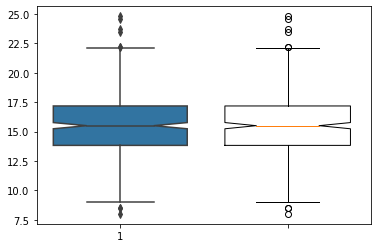

In [16]:
sb.boxplot(data=a['acceleration'],orient='v',notch=True)
plt.boxplot(a['acceleration'],widths=0.75,notch=True)
plt.show()

In [19]:
qu1=a["acceleration"].quantile(0.25)
qu3=a["acceleration"].quantile(0.75)
iqr=qu3-qu1
low=qu1-(iqr*1.5)
high=qu3+(iqr*1.5)
print(low,high)
new=a.loc[(a['acceleration']>=low)&(a['acceleration']<=high)]
print(new.to_string())

8.800000000000008 22.199999999999992
      mpg  cylinders  displacement horsepower  weight  acceleration  model year  origin                              car name
0    18.0          8         307.0        130    3504          12.0          70       1             chevrolet chevelle malibu
1    15.0          8         350.0        165    3693          11.5          70       1                     buick skylark 320
2    18.0          8         318.0        150    3436          11.0          70       1                    plymouth satellite
3    16.0          8         304.0        150    3433          12.0          70       1                         amc rebel sst
4    17.0          8         302.0        140    3449          10.5          70       1                           ford torino
5    15.0          8         429.0        198    4341          10.0          70       1                      ford galaxie 500
6    14.0          8         454.0        220    4354           9.0          70  

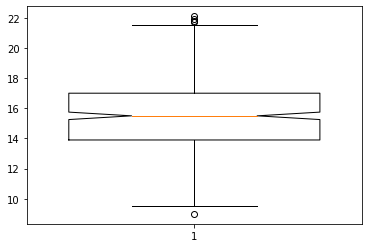

In [20]:
# sb.boxplot(new['acceleration'],orient="y")
plt.boxplot(new['acceleration'],widths=0.75,notch=True)
plt.show()

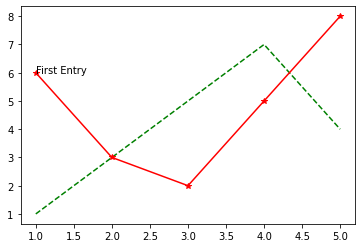

In [26]:
v1=[1,3,5,7,4]
v2=[6,3,2,5,8]
plt.plot(np.arange(1,6),v1,'--',c='g')
plt.plot(np.arange(1,6),v2,'*-',c='r')
plt.annotate(xy=[1,6],text='First Entry')
plt.show()

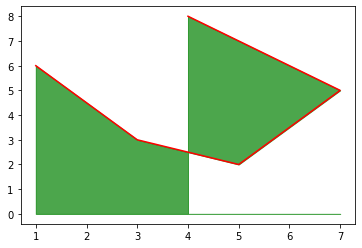

In [27]:
v1=[1,3,5,7,4]
v2=[6,3,2,5,8]
plt.fill_between(v1,v2,color='g',alpha=0.7)
plt.plot(v1,v2,color='r')
plt.show()